<a href="https://colab.research.google.com/github/bunnynaveen77/Landslide-Prediction-project/blob/main/finlatics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas matplotlib seaborn


In [4]:
!pip install seaborn

Dataset Loaded Successfully!
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india        

<ipython-input-10-ba7891a6dc2c>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_channels, x='subscribers', y='youtuber', palette="viridis")


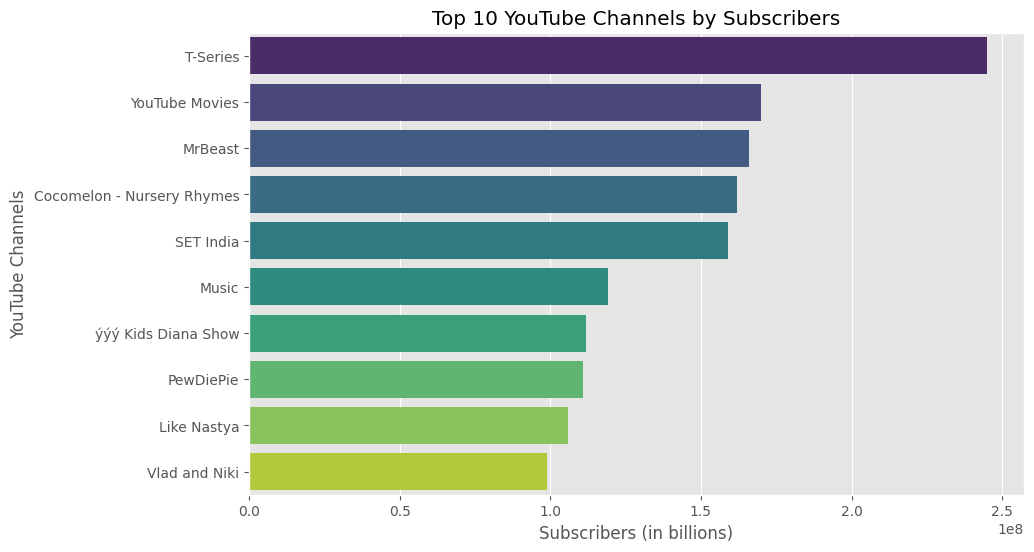


Category with Highest Average Subscribers:
category
Shows                    4.161538e+07
Trailers                 3.900000e+07
Nonprofits & Activism    2.775000e+07
Sports                   2.710909e+07
Film & Animation         2.701333e+07
Education                2.654222e+07
Music                    2.577363e+07
Movies                   2.565000e+07
0                        2.548868e+07
Entertainment            2.144790e+07
Gaming                   2.072021e+07
News & Politics          2.063077e+07
People & Blogs           2.053130e+07
Comedy                   2.012319e+07
Howto & Style            1.951282e+07
Science & Technology     1.861765e+07
Pets & Animals           1.810000e+07
Autos & Vehicles         1.785000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64


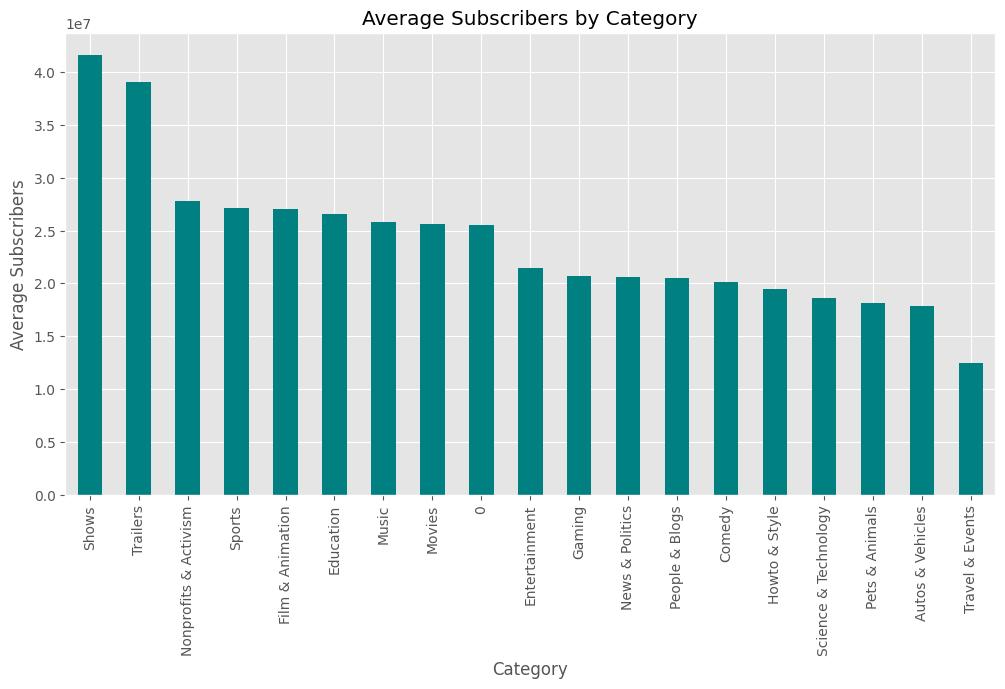


Average Videos Uploaded by Category:
category
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
Shows                     27443.692308
Sports                    14493.727273
Entertainment             12052.445378
People & Blogs             9256.793893
Trailers                   6839.000000
Pets & Animals             4451.500000
Gaming                     4313.414894
Movies                     3553.000000
Education                  3142.866667
Film & Animation           2861.844444
Music                      2347.129353
Science & Technology       2114.058824
Autos & Vehicles           1898.500000
Howto & Style              1700.794872
Comedy                     1119.753623
0                           817.339623
Travel & Events             766.000000
Name: uploads, dtype: float64


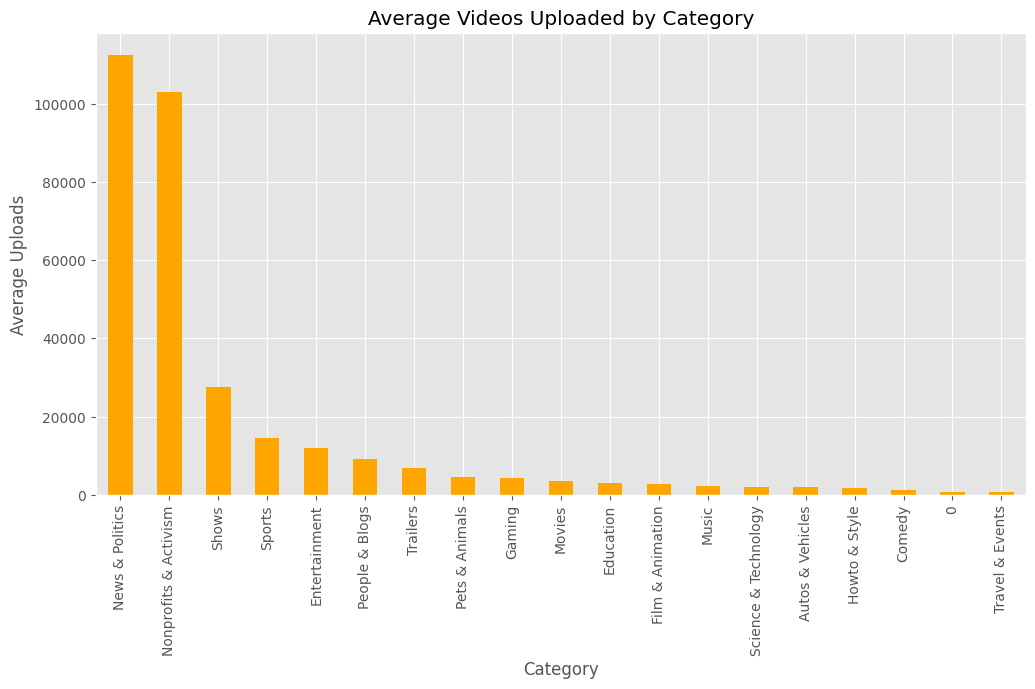


Top 5 Countries with the Highest Number of YouTube Channels:
country
United States     313
India             167
0                 122
Brazil             62
United Kingdom     43
Name: count, dtype: int64


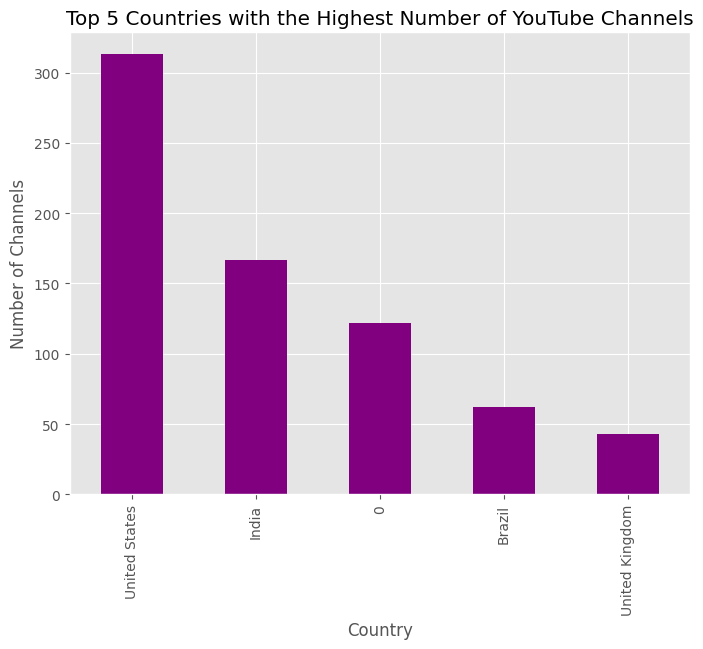

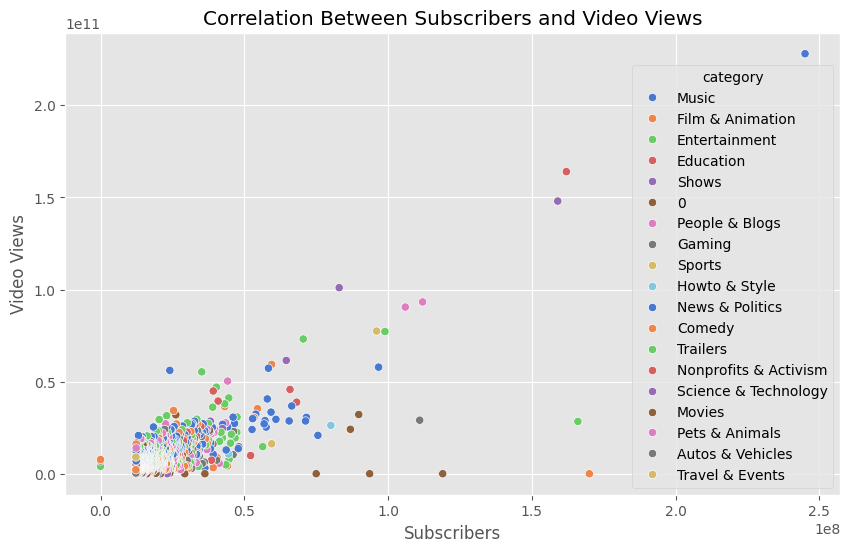


Monthly Earnings by Category:
                       lowest_monthly_earnings  highest_monthly_earnings
category                                                                
0                                 56316.078302              9.010938e+05
Autos & Vehicles                  68300.000000              1.086350e+06
Comedy                            41867.536232              6.683122e+05
Education                         43371.311333              6.951778e+05
Entertainment                     39393.724370              6.293549e+05
Film & Animation                  46802.533556              7.489841e+05
Gaming                            16957.979574              2.719054e+05
Howto & Style                     12053.692821              1.925452e+05
Movies                            28400.000000              4.547000e+05
Music                             34764.449801              5.550474e+05
News & Politics                   40192.625000              6.426320e+05
Nonprofits & Activis

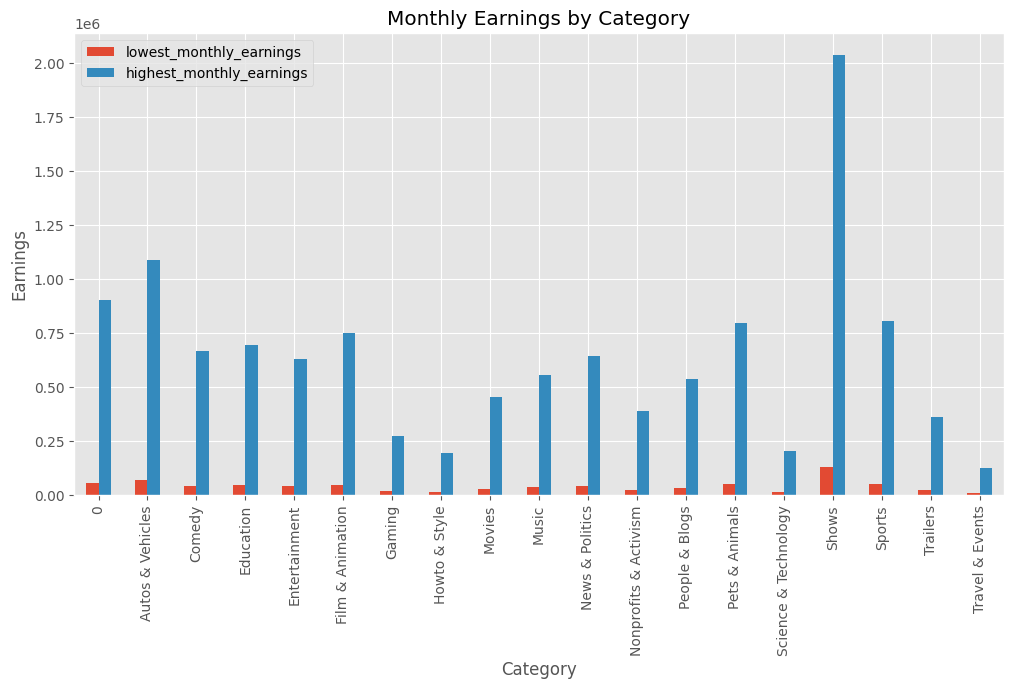

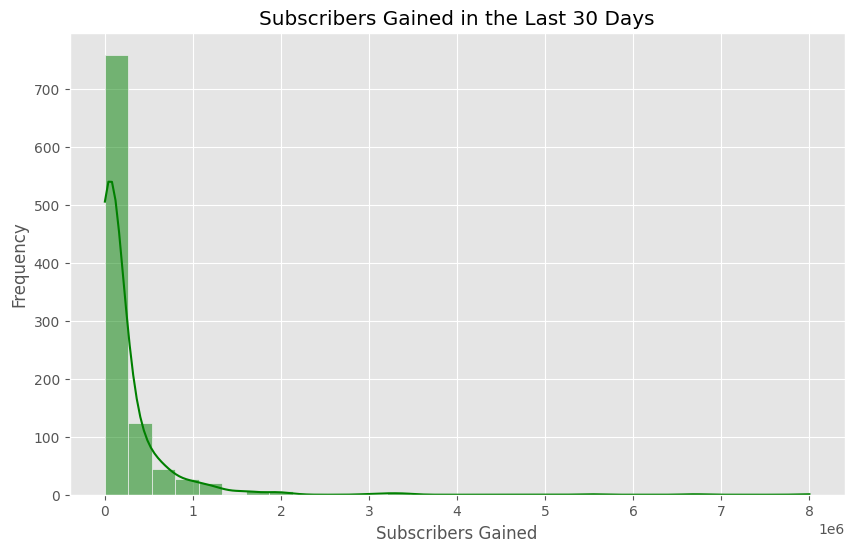

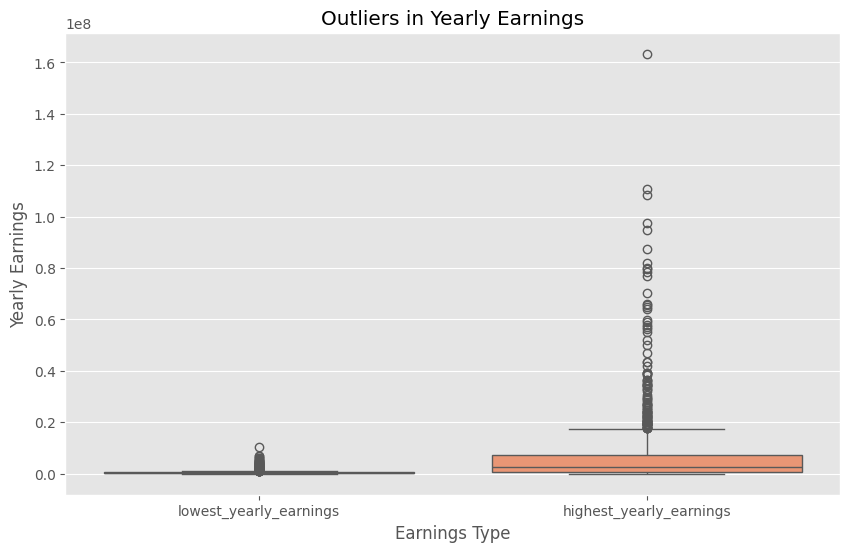

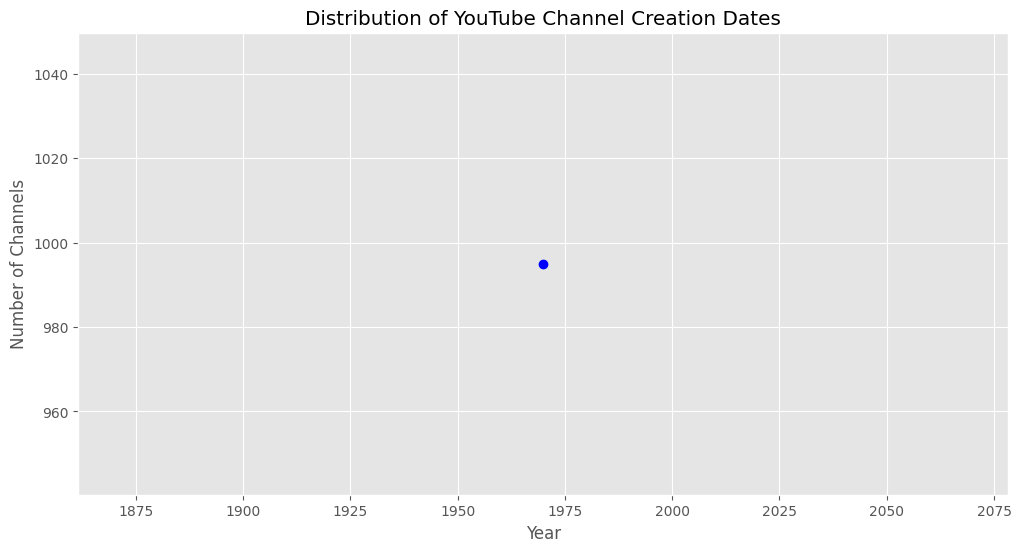

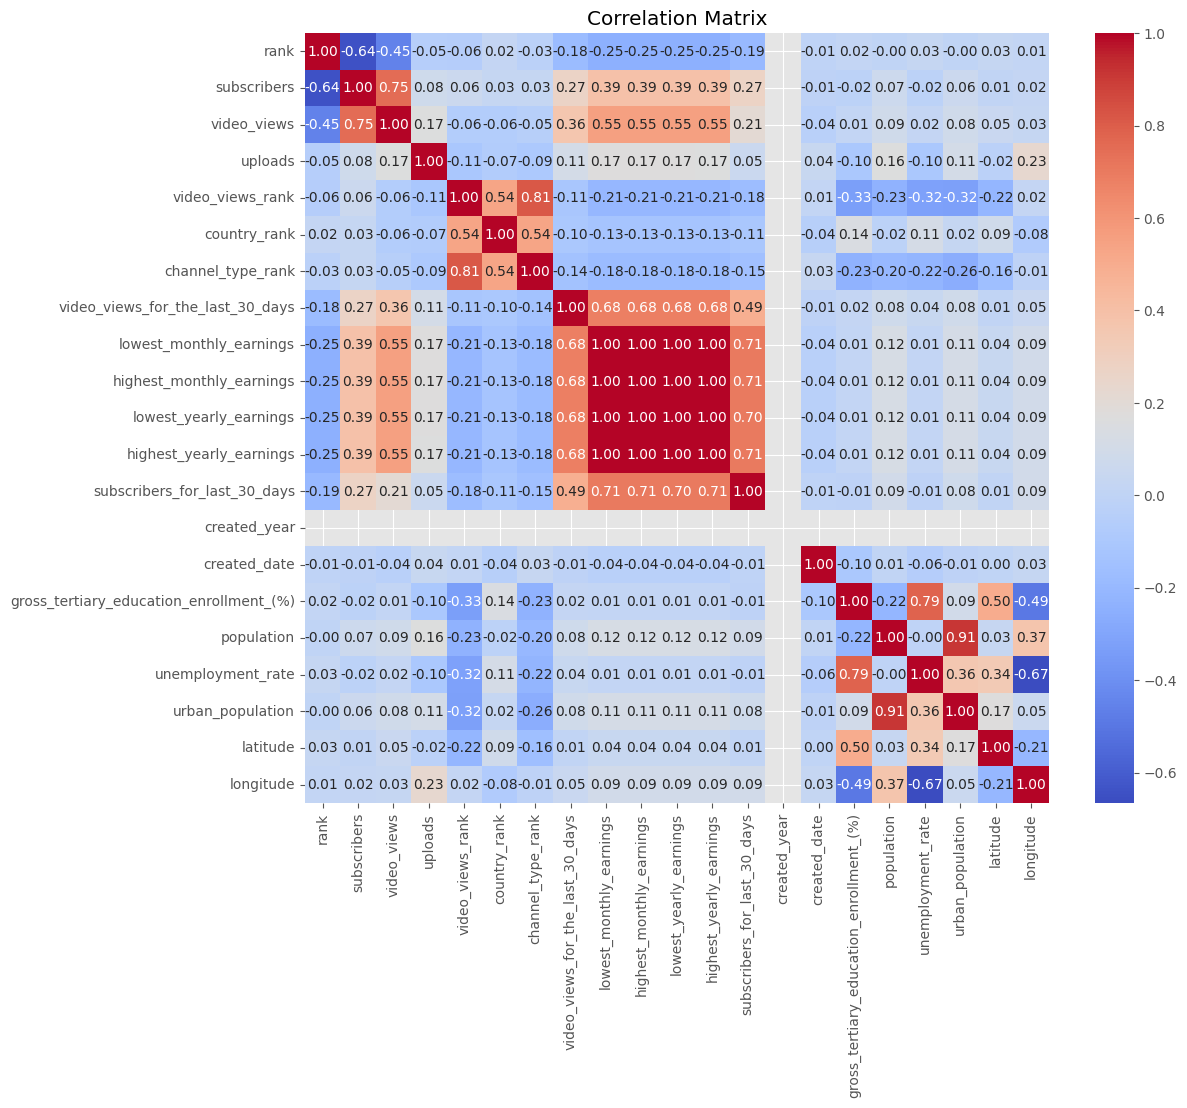


Cleaned dataset saved as 'cleaned_youtube_data.csv'


In [10]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style (using a valid style)
plt.style.use('ggplot')

# Load the dataset
file_name = "youtube_data.csv"  # Update this with your file name
try:
    data = pd.read_csv(file_name, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_name, encoding='latin1')

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(data.head())

# Step 1: Preprocessing the Dataset
# Handling missing values
print("\nMissing Values Before:")
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(0, inplace=True)  # Replace missing values with 0

print("\nMissing Values After:")
print(data.isnull().sum())

# Standardizing column names
data.columns = [col.strip().replace(" ", "_").lower() for col in data.columns]

# Ensure data types are correct
numeric_columns = [
    'subscribers', 'video_views', 'uploads',
    'lowest_monthly_earnings', 'highest_monthly_earnings',
    'lowest_yearly_earnings', 'highest_yearly_earnings',
    'subscribers_for_last_30_days', 'population', 'unemployment_rate',
    'urban_population', 'latitude', 'longitude'
]

for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Remove duplicates
data.drop_duplicates(inplace=True)

# Step 2: Exploratory Data Analysis (EDA)
# Top 10 YouTube channels by subscribers
top_10_channels = data.nlargest(10, 'subscribers')[['youtuber', 'subscribers']]
print("\nTop 10 YouTube Channels by Subscribers:")
print(top_10_channels)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_channels, x='subscribers', y='youtuber', palette="viridis")
plt.title("Top 10 YouTube Channels by Subscribers")
plt.xlabel("Subscribers (in billions)")
plt.ylabel("YouTube Channels")
plt.show()

# Category with the highest average number of subscribers
category_avg_subscribers = data.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print("\nCategory with Highest Average Subscribers:")
print(category_avg_subscribers)

plt.figure(figsize=(12, 6))
category_avg_subscribers.plot(kind='bar', color='teal')
plt.title("Average Subscribers by Category")
plt.xlabel("Category")
plt.ylabel("Average Subscribers")
plt.show()

# Average videos uploaded by category
avg_uploads_by_category = data.groupby('category')['uploads'].mean().sort_values(ascending=False)
print("\nAverage Videos Uploaded by Category:")
print(avg_uploads_by_category)

plt.figure(figsize=(12, 6))
avg_uploads_by_category.plot(kind='bar', color='orange')
plt.title("Average Videos Uploaded by Category")
plt.xlabel("Category")
plt.ylabel("Average Uploads")
plt.show()

# Top 5 countries with the highest number of YouTube channels
top_5_countries = data['country'].value_counts().head(5)
print("\nTop 5 Countries with the Highest Number of YouTube Channels:")
print(top_5_countries)

plt.figure(figsize=(8, 6))
top_5_countries.plot(kind='bar', color='purple')
plt.title("Top 5 Countries with the Highest Number of YouTube Channels")
plt.xlabel("Country")
plt.ylabel("Number of Channels")
plt.show()

# Correlation between subscribers and video views
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='subscribers', y='video_views', hue='category', palette='muted')
plt.title("Correlation Between Subscribers and Video Views")
plt.xlabel("Subscribers")
plt.ylabel("Video Views")
plt.show()

# Monthly earnings variation by category
monthly_earnings = data.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()
print("\nMonthly Earnings by Category:")
print(monthly_earnings)

monthly_earnings.plot(kind='bar', figsize=(12, 6))
plt.title("Monthly Earnings by Category")
plt.xlabel("Category")
plt.ylabel("Earnings")
plt.show()

# Trend of subscribers gained in the last 30 days
plt.figure(figsize=(10, 6))
sns.histplot(data['subscribers_for_last_30_days'], bins=30, kde=True, color='green')
plt.title("Subscribers Gained in the Last 30 Days")
plt.xlabel("Subscribers Gained")
plt.ylabel("Frequency")
plt.show()

# Outliers in yearly earnings
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['lowest_yearly_earnings', 'highest_yearly_earnings']], palette='Set2')
plt.title("Outliers in Yearly Earnings")
plt.xlabel("Earnings Type")
plt.ylabel("Yearly Earnings")
plt.show()

# Channel creation date distribution
data['created_year'] = pd.to_datetime(data['created_date'], errors='coerce').dt.year
creation_year_distribution = data['created_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
creation_year_distribution.plot(kind='line', marker='o', color='blue')
plt.title("Distribution of YouTube Channel Creation Dates")
plt.xlabel("Year")
plt.ylabel("Number of Channels")
plt.show()

# Filter only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


# Save cleaned dataset (optional)
data.to_csv("cleaned_youtube_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_youtube_data.csv'")


Dataset Loaded Successfully!
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india        

<ipython-input-22-cd92f082061e>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_channels, x='subscribers', y='youtuber', palette="viridis")


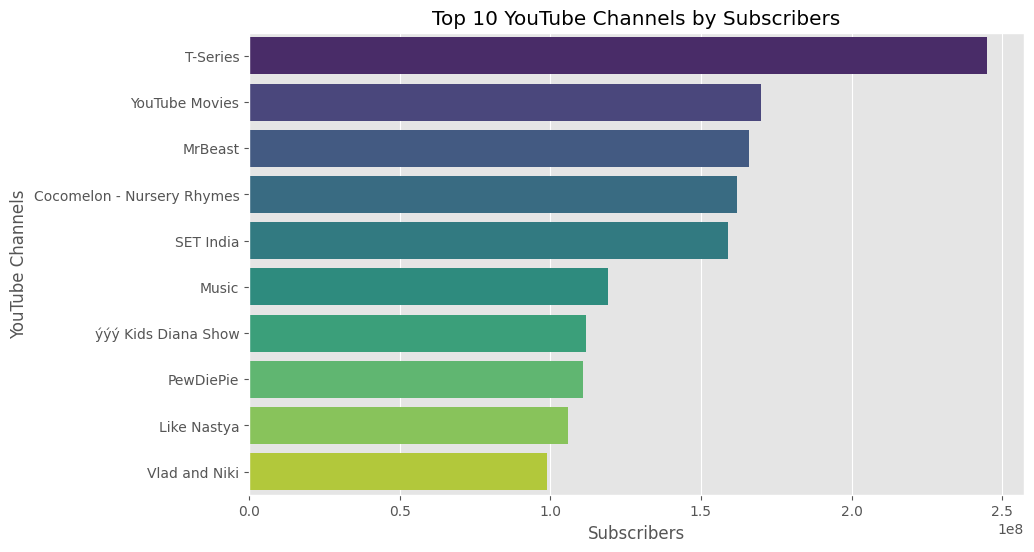

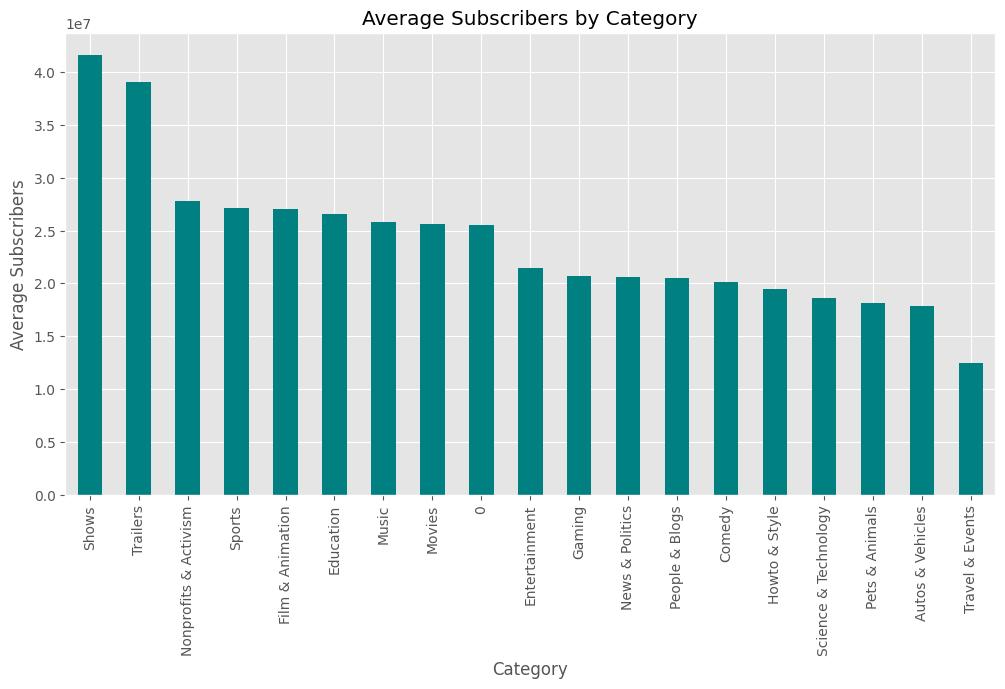

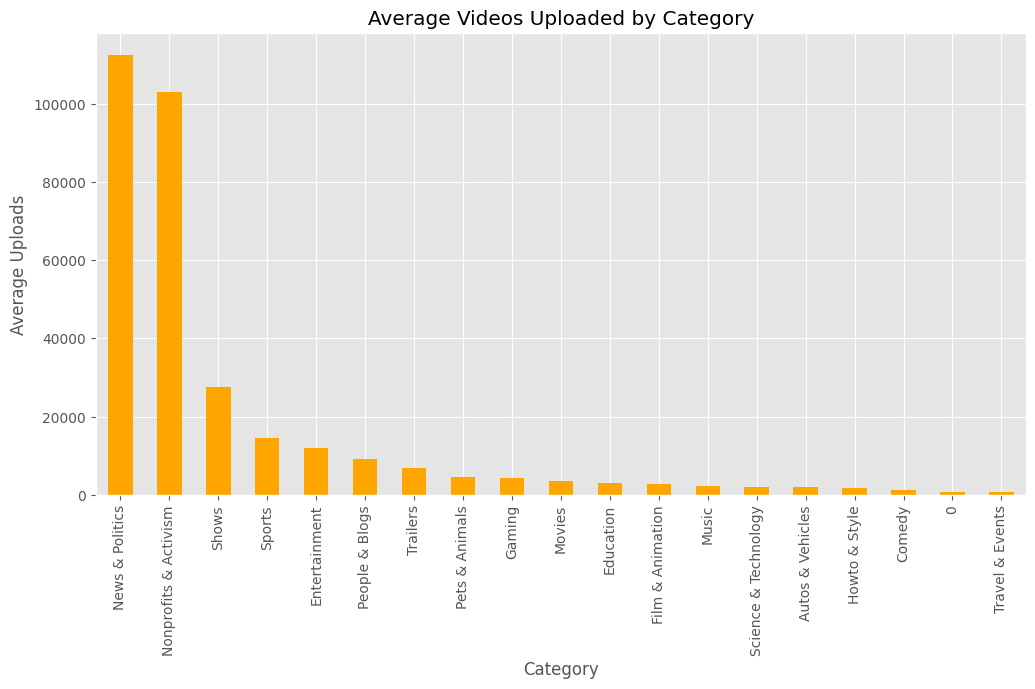

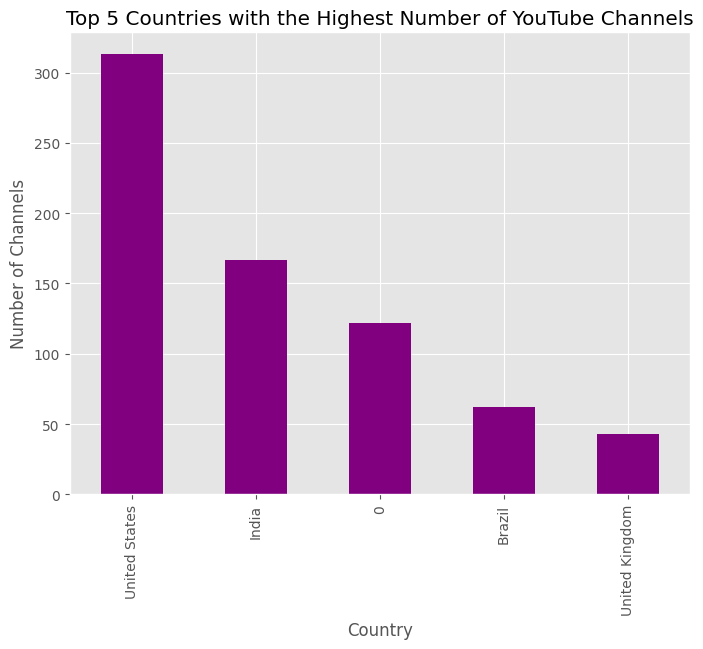


Distribution of Channel Types Across Categories:
category         channel_type 
0                Entertainment    16
                 People           12
                 Games             6
                 Music             6
                 0                 4
                                  ..
Sports           Sports           10
                 Entertainment     1
Trailers         Entertainment     1
                 Music             1
Travel & Events  Entertainment     1
Name: count, Length: 99, dtype: int64


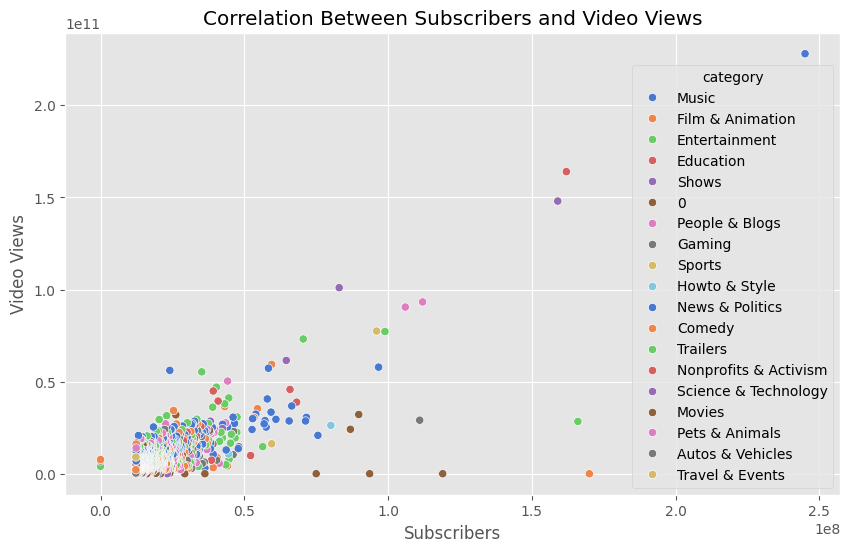

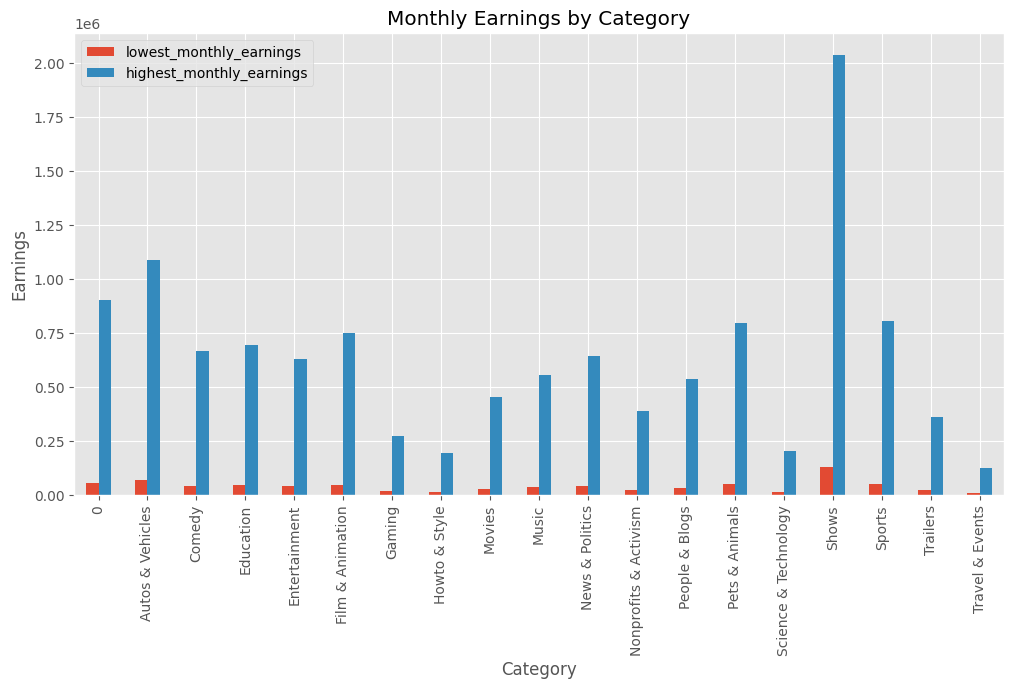

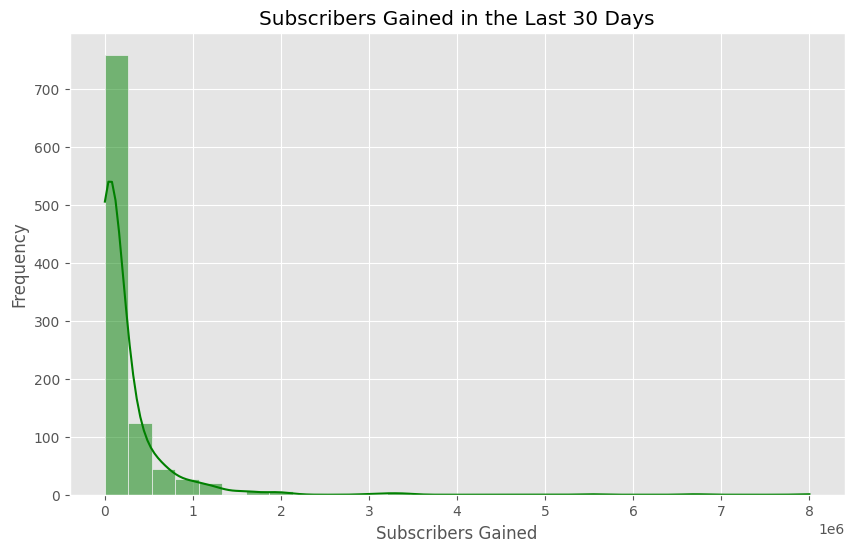

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


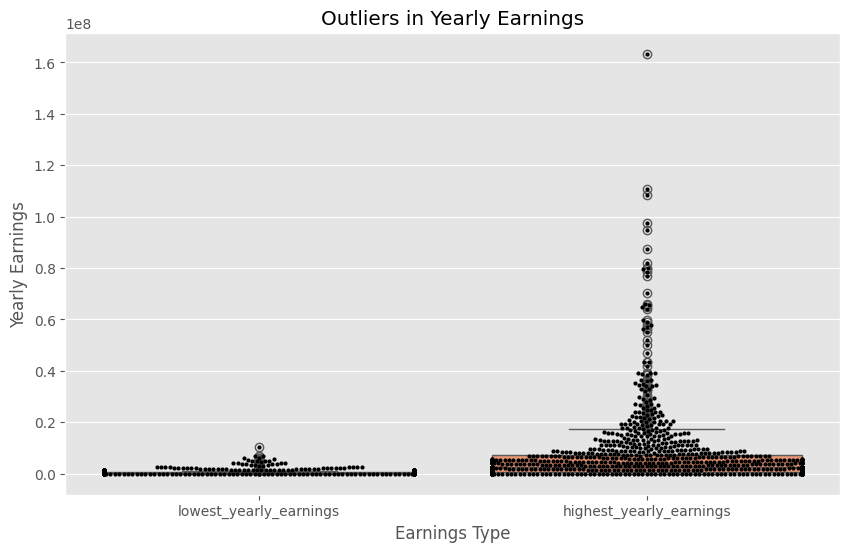

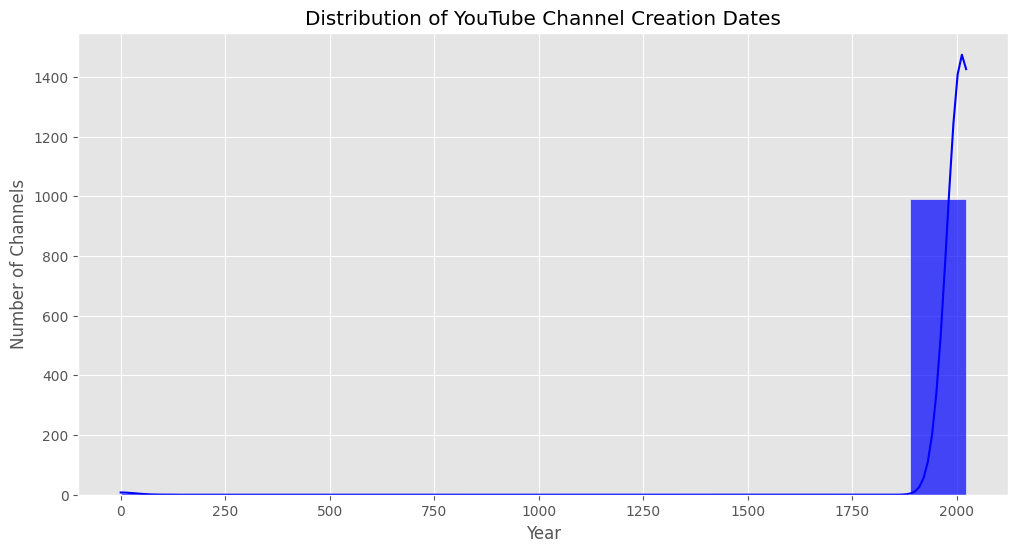

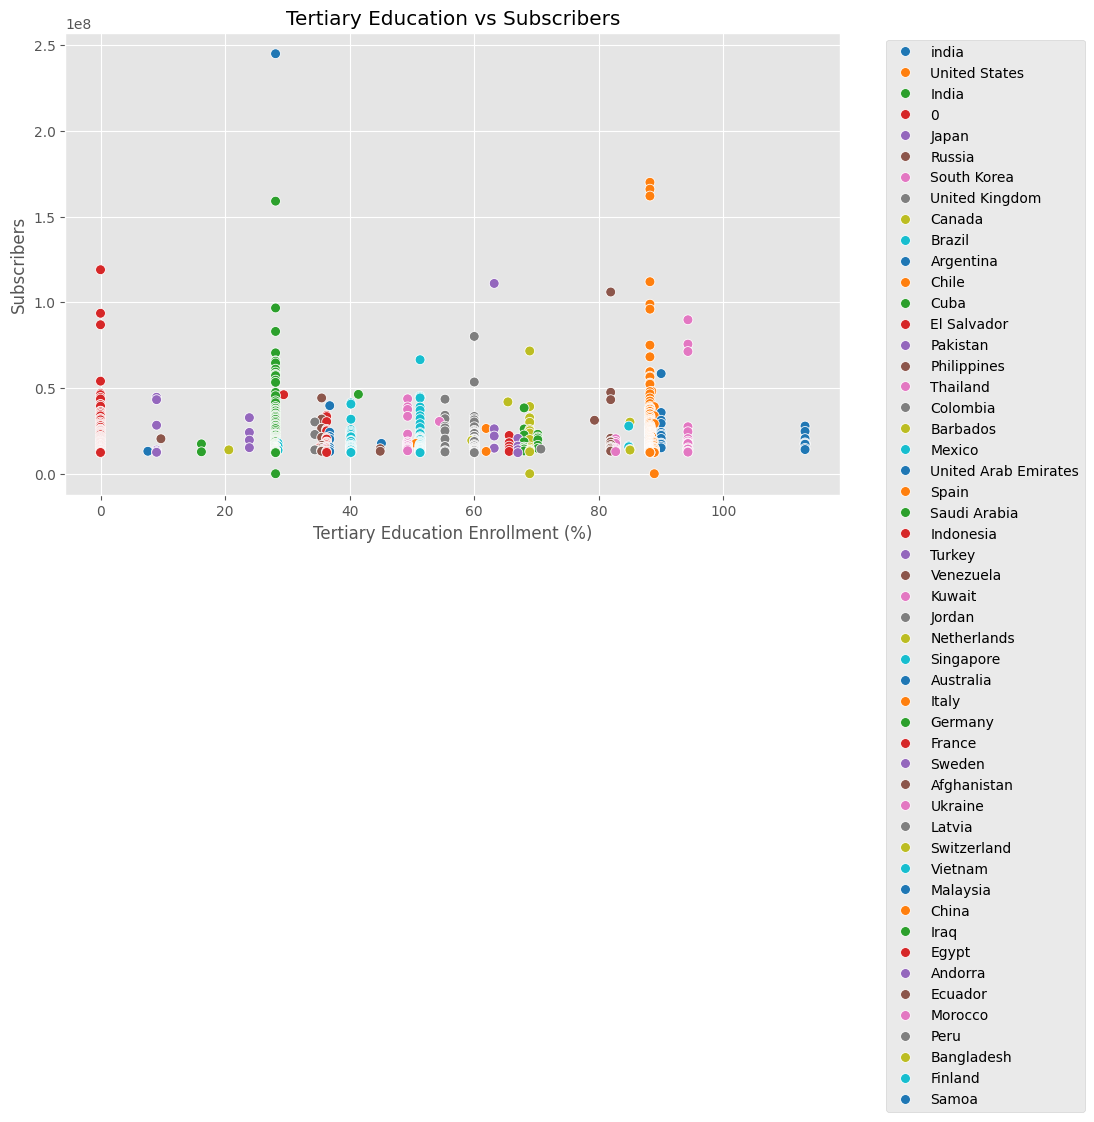

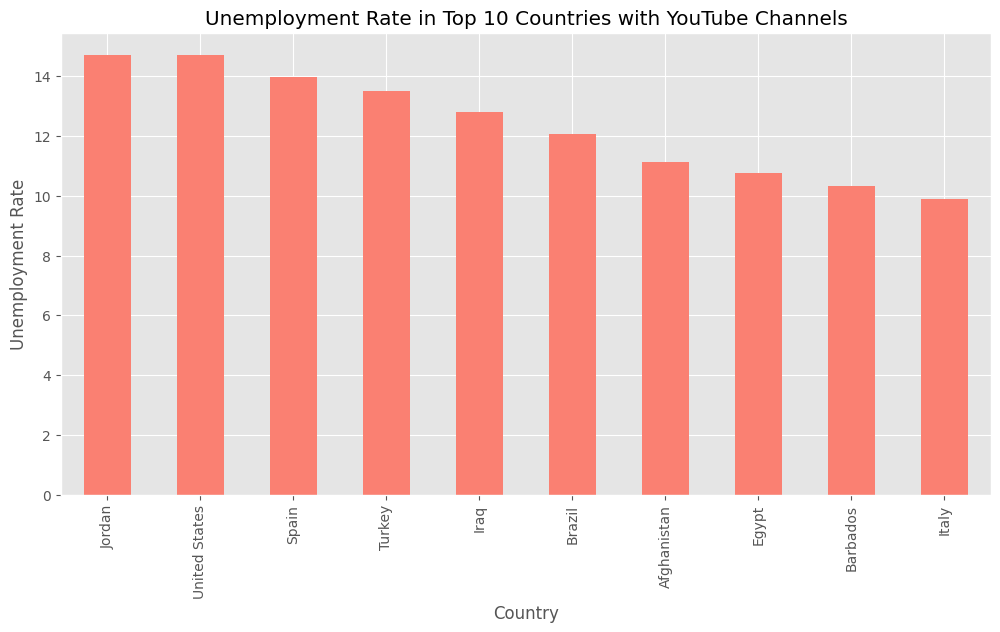


Average Urban Population Percentage by Country:
country
0                               0.0
Afghanistan               9797273.0
Andorra                         0.0
Argentina                41339571.0
Australia                21844756.0
Bangladesh               60987417.0
Barbados                    89431.0
Brazil                  183241641.0
Canada                   30628482.0
Chile                    16610135.0
China                   842933962.0
Colombia                 40827302.0
Cuba                      8739135.0
Ecuador                  11116711.0
Egypt                    42895824.0
El Salvador               4694702.0
Finland                   4716888.0
France                   54123364.0
Germany                  64324835.0
India                   471031528.0
Indonesia               151509724.0
Iraq                     27783368.0
Italy                    42651966.0
Japan                   115782416.0
Jordan                    9213048.0
Kuwait                    4207083.0
Latvia 

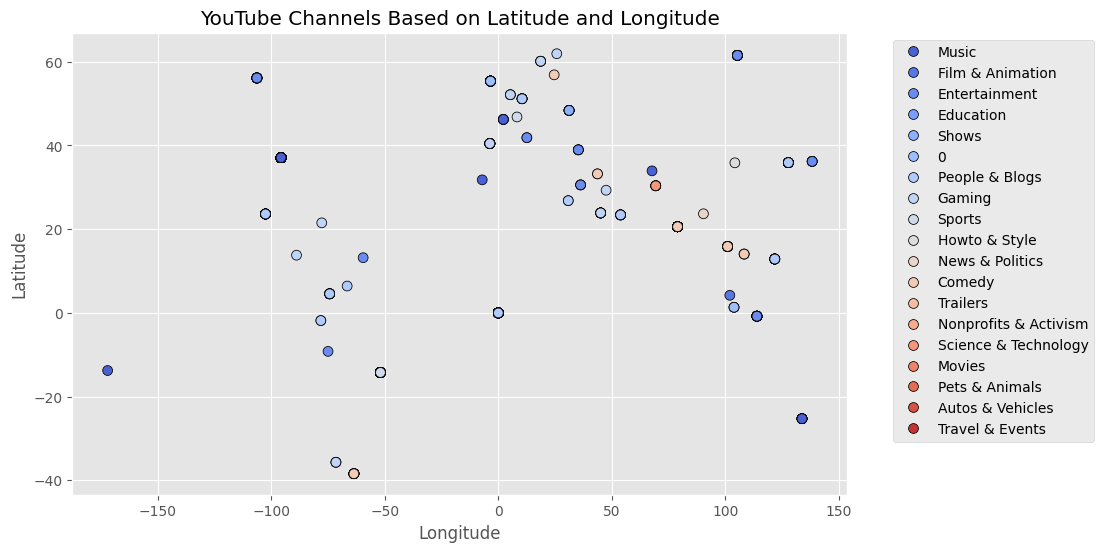

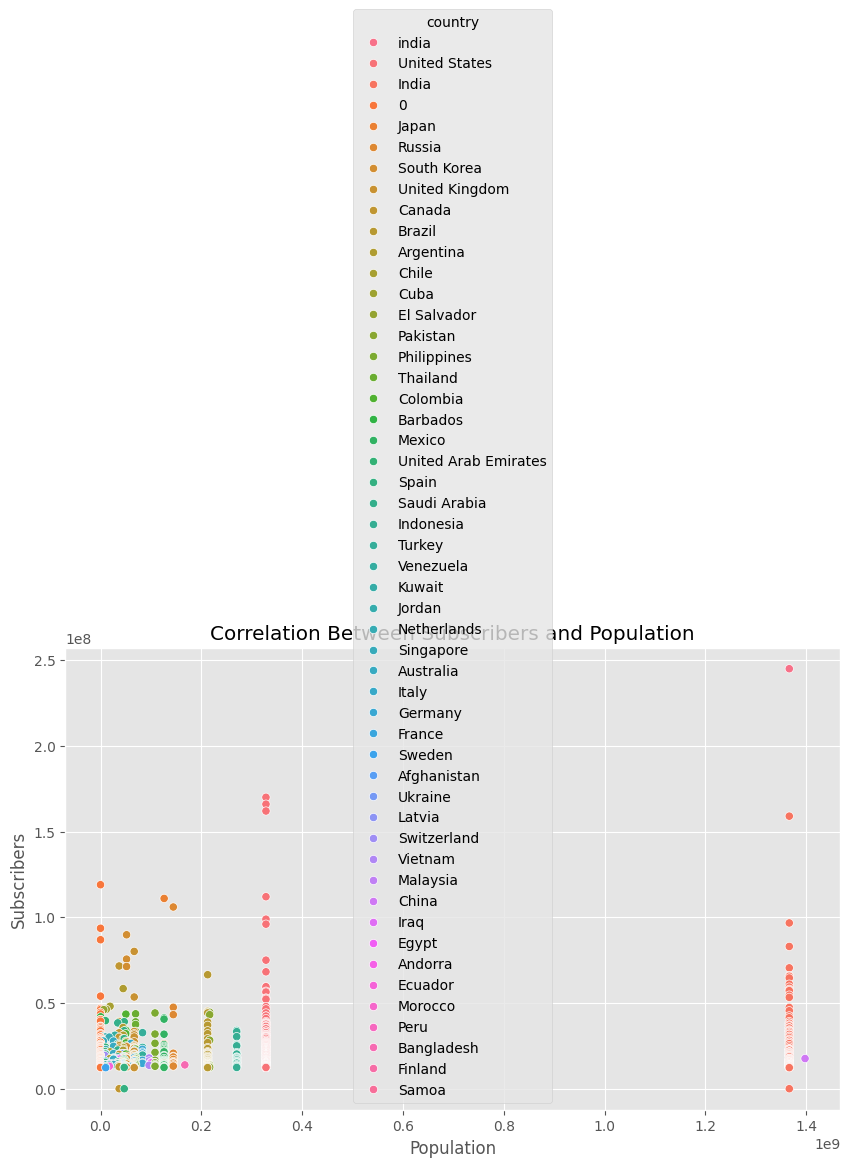

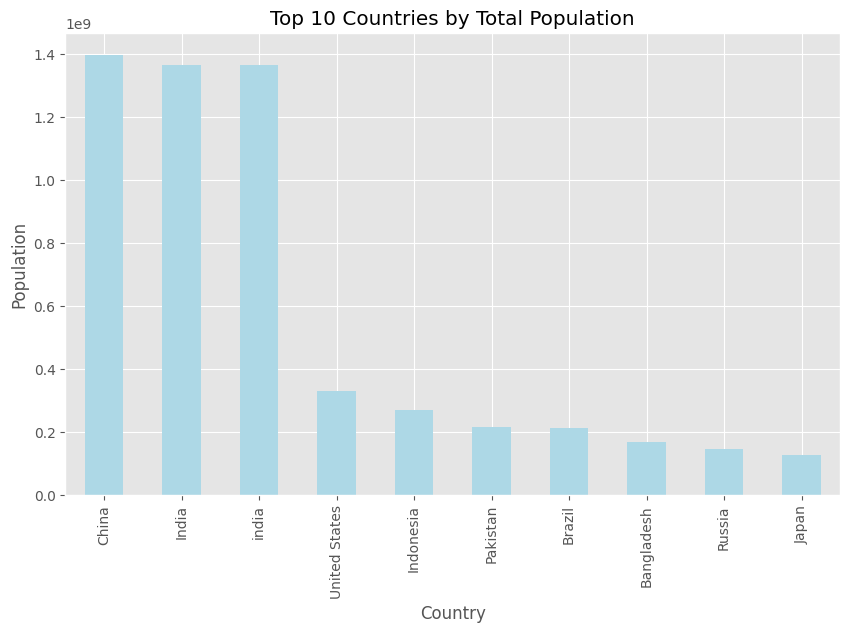

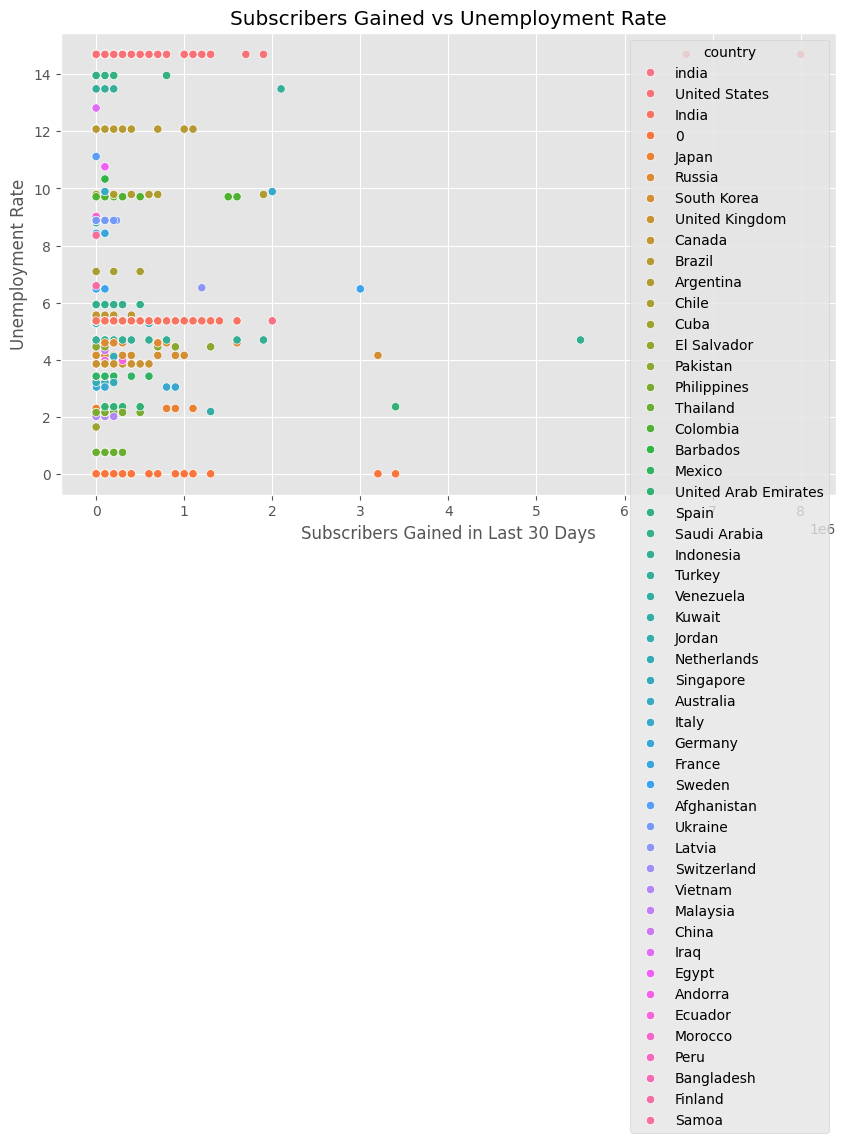

<ipython-input-22-cd92f082061e>:197: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_type_avg_views.values, y=channel_type_avg_views.index, palette='coolwarm')


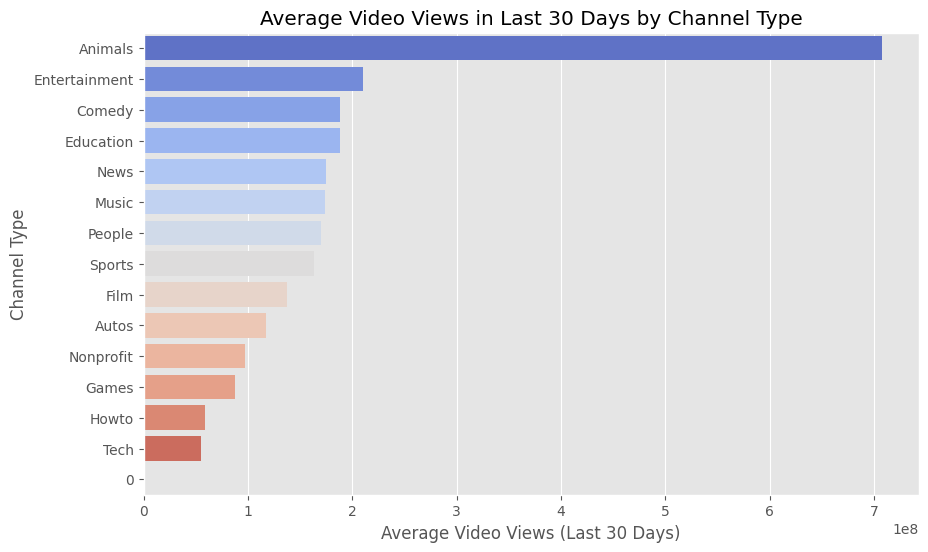

Missing created_month values: 0
Data type of created_month: object
Missing values after conversion: 983
Season distribution: Series([], Name: count, dtype: int64)
Grouped data for seasonal trends: Empty DataFrame
Columns: [created_month, created_season, uploads]
Index: []
No data available for seasonal trends.

Top 10 YouTubers with Highest Average Subscribers Gained Per Month:
                     youtuber  avg_subscribers_per_month
0                    T-Series              365671.641791
1              YouTube Movies              253731.343284
2                     MrBeast              247761.194030
3  Cocomelon - Nursery Rhymes              241791.044776
4                   SET India              237313.432836
5                       Music              177611.940299
6         ýýý Kids Diana Show              167164.179104
7                   PewDiePie              165671.641791
8                 Like Nastya              158208.955224
9               Vlad and Niki              147611

In [22]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style
plt.style.use('ggplot')

# Load the dataset
file_name = "youtube_data.csv"  # Update this with your file name
try:
    data = pd.read_csv(file_name, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_name, encoding='latin1')

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(data.head())

# Step 1: Preprocessing the Dataset
# Handling missing values
print("\nMissing Values Before:")
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(0, inplace=True)  # Replace missing values with 0

print("\nMissing Values After:")
print(data.isnull().sum())

# Standardizing column names
data.columns = [col.strip().replace(" ", "_").lower() for col in data.columns]

# Ensure data types are correct
numeric_columns = [
    'subscribers', 'video_views', 'uploads',
    'lowest_monthly_earnings', 'highest_monthly_earnings',
    'lowest_yearly_earnings', 'highest_yearly_earnings',
    'subscribers_for_last_30_days', 'population', 'unemployment_rate',
    'urban_population', 'latitude', 'longitude'
]

for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Remove duplicates
data.drop_duplicates(inplace=True)

# Step 2: Answering Questions
# Question 1: Top 10 YouTube channels by subscribers
top_10_channels = data.nlargest(10, 'subscribers')[['youtuber', 'subscribers']]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_channels, x='subscribers', y='youtuber', palette="viridis")
plt.title("Top 10 YouTube Channels by Subscribers")
plt.xlabel("Subscribers")
plt.ylabel("YouTube Channels")
plt.show()

# Question 2: Category with the highest average number of subscribers
category_avg_subscribers = data.groupby('category')['subscribers'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_avg_subscribers.plot(kind='bar', color='teal')
plt.title("Average Subscribers by Category")
plt.xlabel("Category")
plt.ylabel("Average Subscribers")
plt.show()

# Question 3: Average videos uploaded by category
avg_uploads_by_category = data.groupby('category')['uploads'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_uploads_by_category.plot(kind='bar', color='orange')
plt.title("Average Videos Uploaded by Category")
plt.xlabel("Category")
plt.ylabel("Average Uploads")
plt.show()

# Question 4: Top 5 countries with the highest number of YouTube channels
top_5_countries = data['country'].value_counts().head(5)
plt.figure(figsize=(8, 6))
top_5_countries.plot(kind='bar', color='purple')
plt.title("Top 5 Countries with the Highest Number of YouTube Channels")
plt.xlabel("Country")
plt.ylabel("Number of Channels")
plt.show()

# Question 5: Distribution of channel types across different categories
channel_type_dist = data.groupby('category')['channel_type'].value_counts()
print("\nDistribution of Channel Types Across Categories:")
print(channel_type_dist)

# Question 6: Correlation between subscribers and video views
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='subscribers', y='video_views', hue='category', palette='muted')
plt.title("Correlation Between Subscribers and Video Views")
plt.xlabel("Subscribers")
plt.ylabel("Video Views")
plt.show()

# Question 7: Monthly earnings variation by category
monthly_earnings = data.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()
monthly_earnings.plot(kind='bar', figsize=(12, 6))
plt.title("Monthly Earnings by Category")
plt.xlabel("Category")
plt.ylabel("Earnings")
plt.show()

# Question 8: Trend of subscribers gained in the last 30 days
plt.figure(figsize=(10, 6))
sns.histplot(data['subscribers_for_last_30_days'], bins=30, kde=True, color='green')
plt.title("Subscribers Gained in the Last 30 Days")
plt.xlabel("Subscribers Gained")
plt.ylabel("Frequency")
plt.show()

# Question 9: Outliers in yearly earnings
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['lowest_yearly_earnings', 'highest_yearly_earnings']], palette='Set2')
sns.swarmplot(data=data[['lowest_yearly_earnings', 'highest_yearly_earnings']], color='k', size=3)
plt.title("Outliers in Yearly Earnings")
plt.xlabel("Earnings Type")
plt.ylabel("Yearly Earnings")
plt.show()


# Question 10: Channel creation date distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='created_year', bins=15, kde=True, color='blue', alpha=0.7)
plt.title("Distribution of YouTube Channel Creation Dates")
plt.xlabel("Year")
plt.ylabel("Number of Channels")
plt.show()


# Question 11: Relationship between tertiary education enrollment and number of YouTube channels in a country
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gross_tertiary_education_enrollment_(%)', y='subscribers', hue='country', palette='tab10', s=50)
plt.title("Tertiary Education vs Subscribers")
plt.xlabel("Tertiary Education Enrollment (%)")
plt.ylabel("Subscribers")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Question 12: Unemployment rate in top 10 countries with highest YouTube channels
top_10_unemployment = data.groupby('country')['unemployment_rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_unemployment.plot(kind='bar', color='salmon')
plt.title("Unemployment Rate in Top 10 Countries with YouTube Channels")
plt.xlabel("Country")
plt.ylabel("Unemployment Rate")
plt.show()

# Question 13: Average urban population percentage in countries with YouTube channels
avg_urban_pop = data.groupby('country')['urban_population'].mean()
print("\nAverage Urban Population Percentage by Country:")
print(avg_urban_pop)

# Question 14: Patterns in YouTube channels based on latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='category', palette='coolwarm', s=50, edgecolor='black')
plt.title("YouTube Channels Based on Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Question 15: Correlation between subscribers and population of a country
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='population', y='subscribers', hue='country')
plt.title("Correlation Between Subscribers and Population")
plt.xlabel("Population")
plt.ylabel("Subscribers")
plt.show()

# Question 16: Comparison of top 10 countries with highest YouTube channels by total population
top_10_countries_pop = data.groupby('country')['population'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_countries_pop.plot(kind='bar', color='lightblue')
plt.title("Top 10 Countries by Total Population")
plt.xlabel("Country")
plt.ylabel("Population")
plt.show()

# Question 17: Correlation between subscribers gained in last 30 days and unemployment rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='subscribers_for_last_30_days', y='unemployment_rate', hue='country')
plt.title("Subscribers Gained vs Unemployment Rate")
plt.xlabel("Subscribers Gained in Last 30 Days")
plt.ylabel("Unemployment Rate")
plt.show()

# Question 18: Distribution of video views in the last 30 days across channel types
plt.figure(figsize=(10, 6))
channel_type_avg_views = data.groupby('channel_type')['video_views_for_the_last_30_days'].mean().sort_values(ascending=False)
sns.barplot(x=channel_type_avg_views.values, y=channel_type_avg_views.index, palette='coolwarm')
plt.title("Average Video Views in Last 30 Days by Channel Type")
plt.xlabel("Average Video Views (Last 30 Days)")
plt.ylabel("Channel Type")
plt.show()



# Question 19: Seasonal trends in videos uploaded

# Step 1: Check for any missing or invalid 'created_month' values
print("Missing created_month values:", data['created_month'].isnull().sum())
print("Data type of created_month:", data['created_month'].dtype)

# Step 2: Ensure 'created_month' is numeric
data['created_month'] = pd.to_numeric(data['created_month'], errors='coerce')
print("Missing values after conversion:", data['created_month'].isnull().sum())

# Step 3: Map 'created_month' to 'created_season'
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
data['created_season'] = data['created_month'].map(seasons)

# Step 4: Check if the season mapping is correct
print("Season distribution:", data['created_season'].value_counts())

# Step 5: Group by 'created_month' and 'created_season' and check the result
uploads_seasonal_trend = data.groupby(['created_month', 'created_season'])['uploads'].sum().reset_index()
print("Grouped data for seasonal trends:", uploads_seasonal_trend.head())

# Step 6: Check if uploads data is meaningful and not empty
if uploads_seasonal_trend.empty:
    print("No data available for seasonal trends.")
else:
    # Proceed with the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=uploads_seasonal_trend, x='created_month', y='uploads', hue='created_season', palette='viridis', marker='o')
    plt.title("Seasonal Trends in Video Uploads", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Total Uploads", fontsize=12)
    plt.legend(title="Season")
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()




# Question 20: Average subscribers gained per month since creation
data['months_since_creation'] = ((pd.to_datetime('today') - pd.to_datetime(data['created_date'], errors='coerce')).dt.days // 30).clip(lower=1)
data['avg_subscribers_per_month'] = data['subscribers'] / data['months_since_creation']
avg_subs_per_month = data[['youtuber', 'avg_subscribers_per_month']].sort_values(by='avg_subscribers_per_month', ascending=False).head(10)
print("\nTop 10 YouTubers with Highest Average Subscribers Gained Per Month:")
print(avg_subs_per_month)
